# K-Mean & DBSCAN
- Bruno Morgado (301154898)

In [1]:
# Necessary Imports
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from collections import defaultdict
import sklearn
from sklearn.datasets import fetch_olivetti_faces
from sklearn.metrics import accuracy_score, silhouette_score, classification_report
from sklearn.svm import SVC
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.model_selection import train_test_split, cross_val_score
import warnings

In [2]:
# Remove annoying alerts 
warnings.filterwarnings('ignore')

In [3]:
# Fetch Olivetti dataset from Sklearn
dataset = fetch_olivetti_faces(shuffle=True, random_state=98)

In [4]:
type(dataset)

sklearn.utils._bunch.Bunch

In [5]:
# Storing features, target variable, and 2d features matrix as images
X = dataset.data
y = dataset.target
images = dataset.images  

In [6]:
type(images)

numpy.ndarray

In [7]:
images.shape

(400, 64, 64)

In [8]:
# Bundle X and y into a dataframe
pixel_columns = [f"pixel_{i}" for i in range(1, X.shape[1] + 1)]

df = pd.DataFrame(X, columns=pixel_columns)

df['target'] = y

In [9]:
df.head()

,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,pixel_10,...,pixel_4088,pixel_4089,pixel_4090,pixel_4091,pixel_4092,pixel_4093,pixel_4094,pixel_4095,pixel_4096,target
0,0.086777,0.099174,0.115702,0.128099,0.214876,0.359504,0.512397,0.603306,0.652893,0.702479,...,0.487603,0.479339,0.466942,0.450413,0.454545,0.454545,0.210744,0.318182,0.491736,37
1,0.260331,0.351240,0.438017,0.553719,0.648760,0.694215,0.747934,0.789256,0.809917,0.830579,...,0.541322,0.516529,0.520661,0.326446,0.074380,0.223140,0.256198,0.309917,0.289256,7
2,0.103306,0.219008,0.177686,0.219008,0.392562,0.574380,0.669421,0.681818,0.710744,0.731405,...,0.367769,0.433884,0.421488,0.425620,0.429752,0.429752,0.438017,0.475207,0.276859,3
3,0.669421,0.636364,0.648760,0.685950,0.710744,0.760331,0.768595,0.805785,0.793388,0.809917,...,0.223140,0.219008,0.115702,0.090909,0.090909,0.095041,0.086777,0.082645,0.074380,13
4,0.425620,0.475207,0.458678,0.500000,0.524793,0.524793,0.541322,0.557851,0.586777,0.553719,...,0.491736,0.690083,0.661157,0.669421,0.524793,0.433884,0.491736,0.483471,0.483471,33


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Columns: 4097 entries, pixel_1 to target
dtypes: float32(4096), int32(1)
memory usage: 6.3 MB


In [11]:
# Define a function to plot (default = 40) sample images
def plot_gallery(images, titles, h, w, n_row=5, n_col=8):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

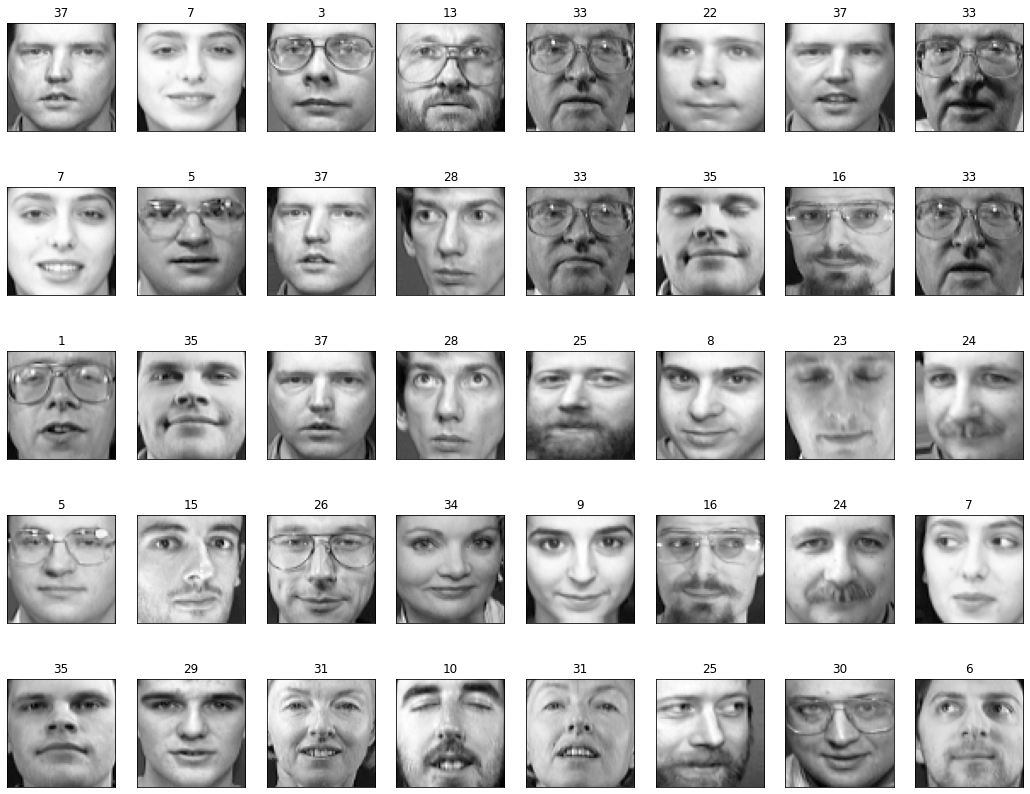

In [12]:
plot_gallery(images, y, h=64, w=64)
plt.show()

In [13]:
# Split dataset into train, validation, and test sets with stratification
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=98, stratify=y)

X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=98, stratify=y_temp)

print(f"Training set size: {len(y_train)}")
print(f"Validation set size: {len(y_valid)}")
print(f"Test set size: {len(y_test)}")

Training set size: 280
Validation set size: 60
Test set size: 60


In [14]:
# Instatiate a Support Vector Classifier
svm_clf = SVC(kernel='rbf', random_state=98)

In [15]:
# Get 5-fold cross validation scores
k = 5
scores = cross_val_score(svm_clf, X_train, y_train, cv=k, scoring='accuracy')

print(f"Cross-validation scores (k={k}):", scores)
print("Average cross-validation score:", scores.mean())

Cross-validation scores (k=5): [0.85714286 0.92857143 0.92857143 0.83928571 0.85714286]
Average cross-validation score: 0.8821428571428571


In [16]:
# Train the SVC classifier
svm_clf.fit(X_train, y_train)

SVC(random_state=98)

In [17]:
# Make predictions and print validation scores on the validation set
y_pred_valid = svm_clf.predict(X_valid)
accuracy = accuracy_score(y_valid, y_pred_valid)
print(f"Validation accuracy with kernel= rbf:", accuracy)

Validation accuracy with kernel= rbf: 0.9333333333333333


In [18]:
# Make predictions on the test set
y_pred = svm_clf.predict(X_test)

In [19]:
# Print the classification report
print('\t\tClassification Report - SVC\n\n', classification_report(y_test, y_pred))

		Classification Report - SVC

               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2
           2       0.00      0.00      0.00         2
           3       1.00      0.50      0.67         2
           4       1.00      0.50      0.67         2
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       0.67      1.00      0.80         2
           8       0.50      1.00      0.67         1
           9       1.00      0.50      0.67         2
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00      

In [20]:
# Explore the target variables further
np.unique(y, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
        10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
        10, 10, 10, 10, 10, 10], dtype=int64))

In [53]:
scores = []
range_clusters = range(2, 200)

In [54]:
# Fit kmeans with a range of clusters an make predictions
for n_clusters in range_clusters:
    kmeans = KMeans(n_clusters=n_clusters, init="k-means++", n_init='auto', random_state=98)
    kmeans.fit(X_train)
    preds = kmeans.predict(X_train)
    score = silhouette_score(X_train, preds)
    scores.append(score)

In [55]:
# Get the silhouette score for each iteration in the for loop above
for i, value in enumerate(scores):
    print(f'Index {i} : {value}')

Index 0 : 0.15040580928325653
Index 1 : 0.12763933837413788
Index 2 : 0.10531938076019287
Index 3 : 0.10427547246217728
Index 4 : 0.10007187724113464
Index 5 : 0.08305481821298599
Index 6 : 0.08263854682445526
Index 7 : 0.07518859207630157
Index 8 : 0.073173888027668
Index 9 : 0.08468463271856308
Index 10 : 0.09262099862098694
Index 11 : 0.09107372164726257
Index 12 : 0.09361782670021057
Index 13 : 0.09615043550729752
Index 14 : 0.08599311113357544
Index 15 : 0.08935511112213135
Index 16 : 0.09138374030590057
Index 17 : 0.10017868131399155
Index 18 : 0.10079923272132874
Index 19 : 0.10017043352127075
Index 20 : 0.10201352834701538
Index 21 : 0.10470715910196304
Index 22 : 0.10446251928806305
Index 23 : 0.10010135918855667
Index 24 : 0.10107807070016861
Index 25 : 0.10394089668989182
Index 26 : 0.10997769236564636
Index 27 : 0.11223439127206802
Index 28 : 0.11691679060459137
Index 29 : 0.11985310167074203
Index 30 : 0.12723535299301147
Index 31 : 0.13064169883728027
Index 32 : 0.1336577

In [56]:
# Get the highest silhouette score
best_n_clusters = range_clusters[scores.index(max(scores))]

In [57]:
best_n_clusters

79

In [58]:
best_n_scores = scores[scores.index(max(scores))]

In [27]:
best_n_scores

0.18284288

In [59]:
scores[77]

0.18284288

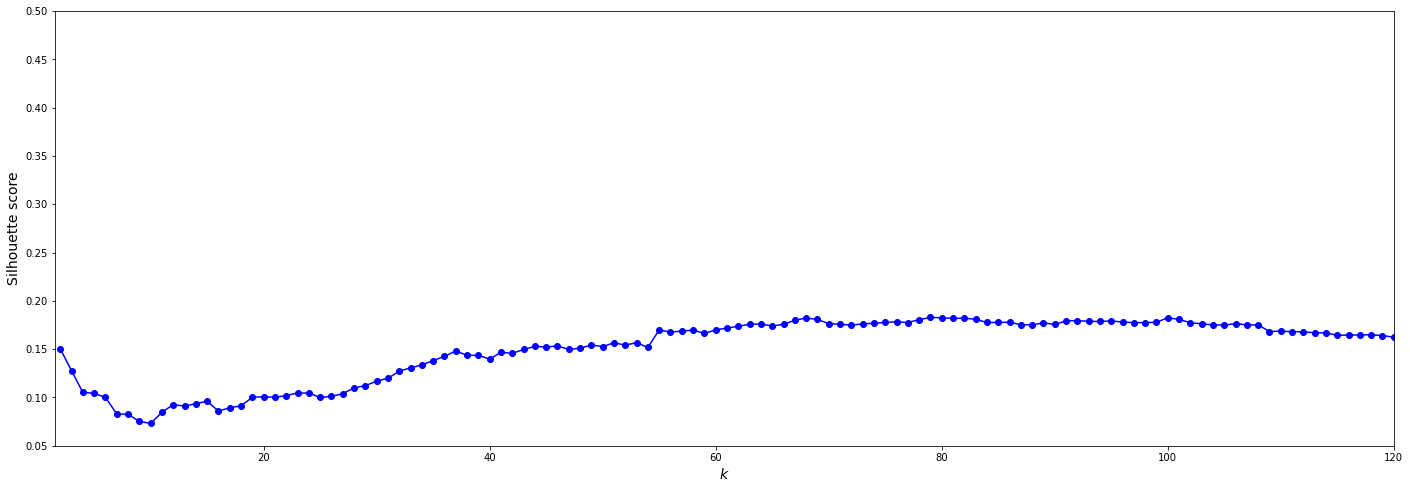

In [60]:
plt.figure(figsize=(24, 8))
plt.plot(range_clusters, scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.5, 120, 0.05, 0.5])
plt.show()

In [61]:
# Reduce the dataset dimensionality according to the number of clusters that returned the highest silhouette score
kmeans = KMeans(n_clusters=79, init="k-means++", n_init='auto', random_state=98)

In [62]:
X_reduced = kmeans.fit_transform(X)

In [63]:
X_reduced.shape

(400, 79)

In [64]:
# Array with the first instance's distances to the centroids
X_reduced[0]

array([11.988758 , 11.11365  , 15.363498 ,  9.444666 , 11.000386 ,
        5.4597178,  9.867196 ,  8.780561 , 12.209009 ,  9.978074 ,
       14.158886 , 14.16626  , 11.892452 ,  8.184852 ,  7.400579 ,
       11.166139 , 11.0718565, 12.919109 , 13.880829 , 11.196977 ,
        8.596896 , 11.290294 ,  9.71953  ,  9.962675 , 14.4639015,
       13.494672 , 13.580415 ,  9.469277 , 11.30324  , 11.732554 ,
       11.46953  ,  9.1103525, 10.009584 , 10.687915 , 10.7051325,
       10.389788 ,  9.519195 , 10.605962 , 10.743815 ,  9.234018 ,
       11.074283 , 13.077244 , 13.626669 ,  8.276454 , 14.109044 ,
       12.779579 , 13.597022 ,  9.647831 ,  8.340371 ,  6.6628537,
       11.615242 , 13.948507 ,  9.404628 ,  8.8362   , 13.465821 ,
        9.559306 , 11.116907 , 10.479551 , 11.788693 ,  9.9946785,
       11.711618 ,  9.873837 ,  9.338231 , 11.875794 , 13.702015 ,
        9.150525 ,  8.512709 , 16.701874 , 11.092509 , 12.574738 ,
        8.481403 , 11.284654 , 10.599734 ,  9.639815 ,  9.8834

In [65]:
# Split the reduced Olivetti dataset 
X_train_reduced, X_temp_reduced, y_train, y_temp = train_test_split(X_reduced, y, test_size=0.3, random_state=98, stratify=y)

X_valid_reduced, X_test_reduced, y_valid, y_test = train_test_split(X_temp_reduced, y_temp, test_size=0.5, random_state=98, stratify=y_temp)

print(f"Training set size: {len(y_train)}")
print(f"Validation set size: {len(y_valid)}")
print(f"Test set size: {len(y_test)}")

Training set size: 280
Validation set size: 60
Test set size: 60


In [66]:
# Retrain the classifier with the reduced dataset
svm_clf.fit(X_train_reduced, y_train)

SVC(random_state=98)

In [67]:
k = 5
scores = cross_val_score(svm_clf, X_train_reduced, y_train, cv=k, scoring='accuracy')

print(f"Cross-validation scores (k={k}):", scores)
print("Average cross-validation score:", scores.mean())

Cross-validation scores (k=5): [0.55357143 0.57142857 0.67857143 0.46428571 0.67857143]
Average cross-validation score: 0.5892857142857142


In [68]:
y_pred_valid_reduced = svm_clf.predict(X_valid_reduced)
accuracy = accuracy_score(y_valid, y_pred_valid_reduced)
print(f"Validation accuracy with kernel= rbf:", accuracy)

Validation accuracy with kernel= rbf: 0.65


In [69]:
y_pred_reduced = svm_clf.predict(X_test_reduced)

In [70]:
# Print the classification report
print('\t\tClassification Report - SVC\n\n', classification_report(y_test, y_pred_reduced))

		Classification Report - SVC

               precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      1.00      1.00         2
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         2
           4       1.00      0.50      0.67         2
           5       0.00      0.00      0.00         1
           6       0.67      1.00      0.80         2
           7       1.00      1.00      1.00         2
           8       0.33      1.00      0.50         1
           9       0.00      0.00      0.00         2
          10       0.50      1.00      0.67         1
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          13       0.50      1.00      0.67         1
          14       0.50      1.00      0.67         1
          15       0.00      0.00      0.00         2
          16       0.00      0.00      0.00      

## DBSCAN

In [71]:
X.shape

(400, 4096)

In [72]:
X[:10]

array([[0.08677686, 0.09917355, 0.11570248, ..., 0.2107438 , 0.3181818 ,
        0.49173555],
       [0.2603306 , 0.35123968, 0.43801653, ..., 0.25619835, 0.30991736,
        0.2892562 ],
       [0.10330579, 0.21900827, 0.17768595, ..., 0.43801653, 0.4752066 ,
        0.2768595 ],
       ...,
       [0.48347107, 0.446281  , 0.46280992, ..., 0.661157  , 0.6735537 ,
        0.6694215 ],
       [0.35123968, 0.4338843 , 0.553719  , ..., 0.1570248 , 0.2107438 ,
        0.20661157],
       [0.7107438 , 0.7107438 , 0.70247936, ..., 0.553719  , 0.30991736,
        0.30991736]], dtype=float32)

In [74]:
# Testing the distance and min_samples manually
dbscan = DBSCAN(eps = 7.24, min_samples=2)
clusters = dbscan.fit_predict(X)

In [75]:
print(np.unique(clusters))

[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]


In [76]:
print(len(np.unique(clusters)))

47


In [77]:
#Outliers
print(len(clusters[clusters == -1]))

34


In [78]:
images = X.reshape(-1, 64, 64)

In [79]:
images.shape

(400, 64, 64)

In [80]:
clustered_images = defaultdict(list)
for i, cluster in enumerate(clusters):
    clustered_images[cluster].append(images[i])

In [81]:
def display_images(images, title=""):
    n_images = len(images)
    rows = int(n_images**0.5)
    cols = (n_images // rows) + (n_images % rows)
    
    plt.figure(figsize=(1.5*cols, 1.5*rows))
    for i in range(n_images):
        ax = plt.subplot(rows, cols, i + 1)
        plt.imshow(images[i], cmap="gray")
        ax.axis('off')
    
    plt.suptitle(title)
    plt.show()

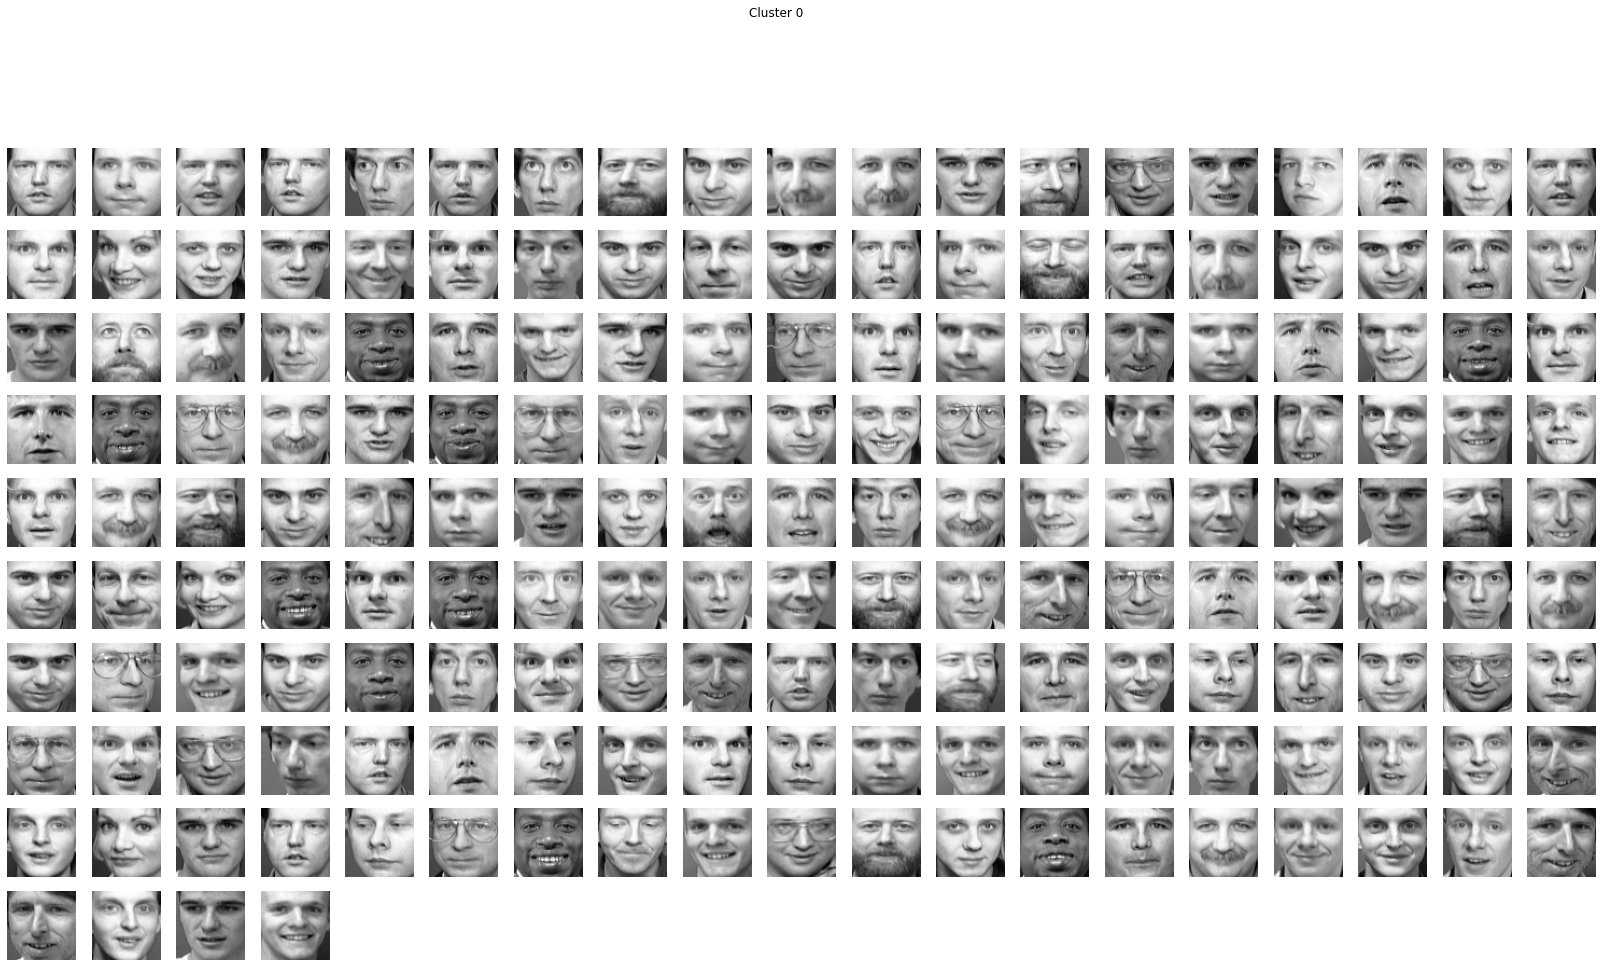

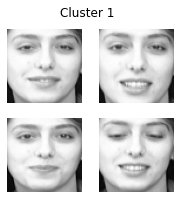

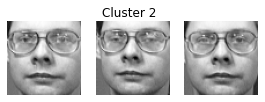

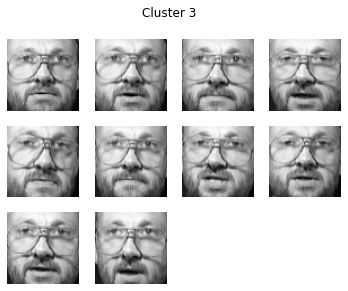

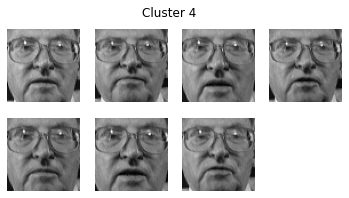

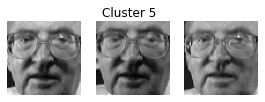

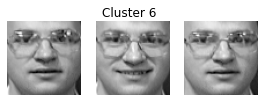

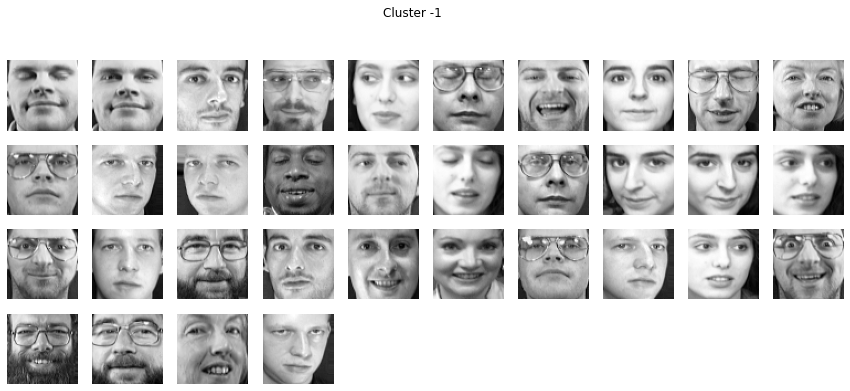

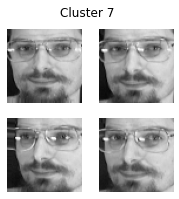

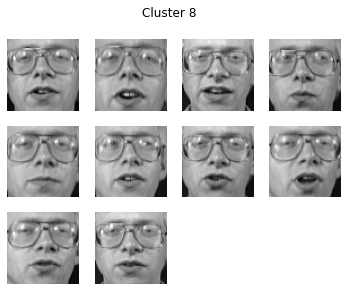

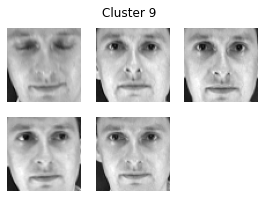

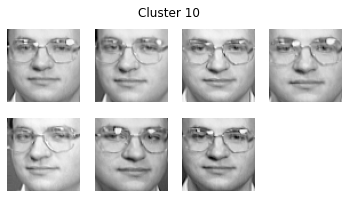

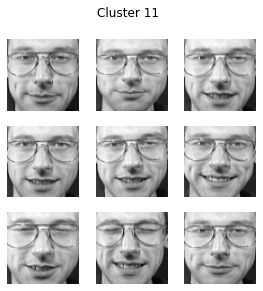

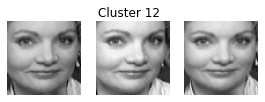

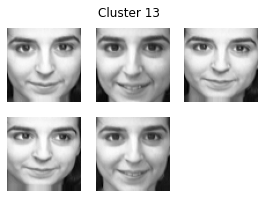

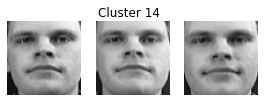

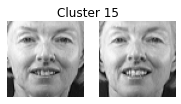

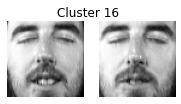

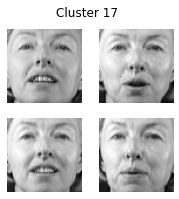

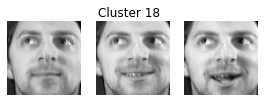

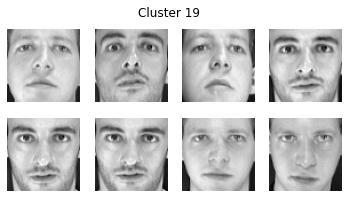

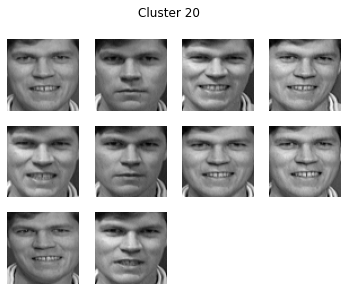

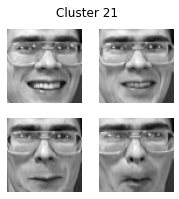

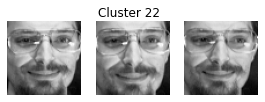

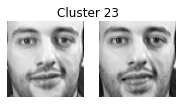

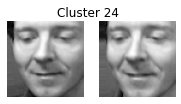

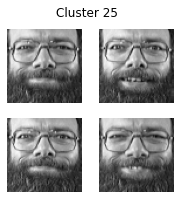

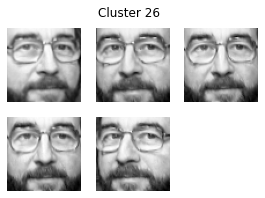

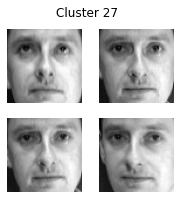

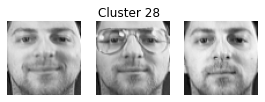

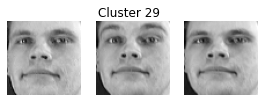

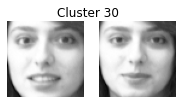

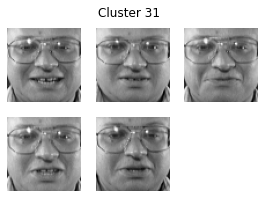

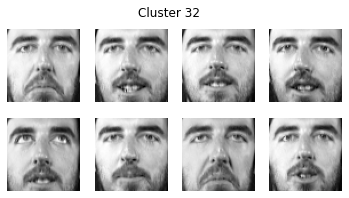

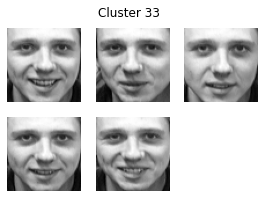

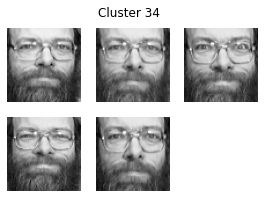

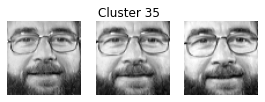

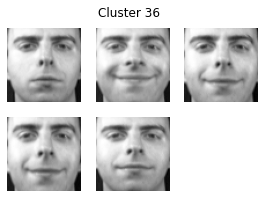

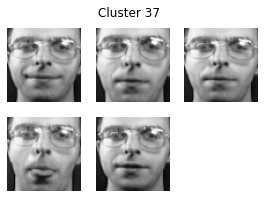

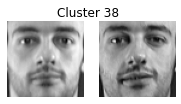

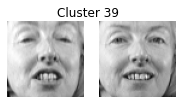

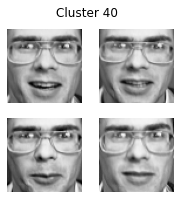

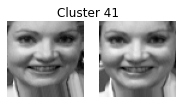

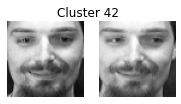

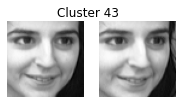

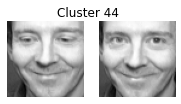

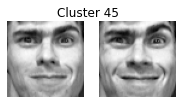

In [50]:
for cluster, images in clustered_images.items():
    display_images(images, title=f"Cluster {cluster}")